<a href="https://colab.research.google.com/github/poniyam/poniyam.github.io/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고,
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편리합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Dataset 확인

In [3]:
#데이터 불러오기
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [5]:
#데이터 확인
df_train.head()

#중요한 피처는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

#passengerID 에 null data 가 존재하는 것으로 예상

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#null data check
for col in df_train.columns:
    msg = 'column: {:>10}\t Precent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Precent of NaN value: 0.00%
column:   Survived	 Precent of NaN value: 0.00%
column:     Pclass	 Precent of NaN value: 0.00%
column:       Name	 Precent of NaN value: 0.00%
column:        Sex	 Precent of NaN value: 0.00%
column:        Age	 Precent of NaN value: 19.87%
column:      SibSp	 Precent of NaN value: 0.00%
column:      Parch	 Precent of NaN value: 0.00%
column:     Ticket	 Precent of NaN value: 0.00%
column:       Fare	 Precent of NaN value: 0.00%
column:      Cabin	 Precent of NaN value: 77.10%
column:   Embarked	 Precent of NaN value: 0.22%


## Null data check

In [9]:
#null data check
for col in df_test.columns:
    msg = 'column: {:>10}\t Precent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

# Train, Test 에서 Age는 둘다 약 20%, Carbin은 둘다 약 80%, Embarked는 Train만 0.22% null data 존재 확인

column: PassengerId	 Precent of NaN value: 0.00%
column:     Pclass	 Precent of NaN value: 0.00%
column:       Name	 Precent of NaN value: 0.00%
column:        Sex	 Precent of NaN value: 0.00%
column:        Age	 Precent of NaN value: 20.57%
column:      SibSp	 Precent of NaN value: 0.00%
column:      Parch	 Precent of NaN value: 0.00%
column:     Ticket	 Precent of NaN value: 0.00%
column:       Fare	 Precent of NaN value: 0.24%
column:      Cabin	 Precent of NaN value: 78.23%
column:   Embarked	 Precent of NaN value: 0.00%


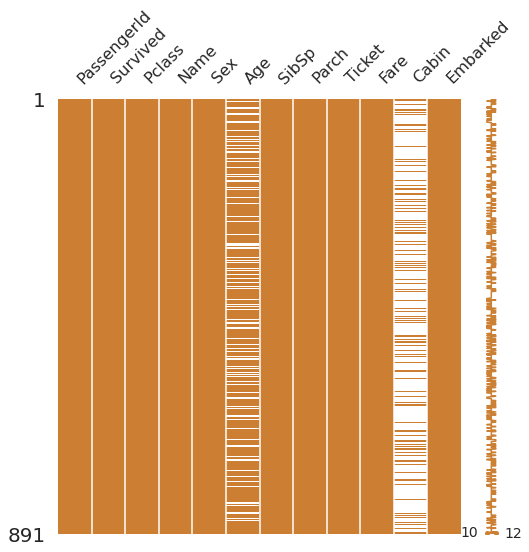

In [10]:
# mamo 라이브러리를 사용해 null data의 존재를 더 쉽게 확인
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), 
            color=(0.8, 0.5, 0.2))

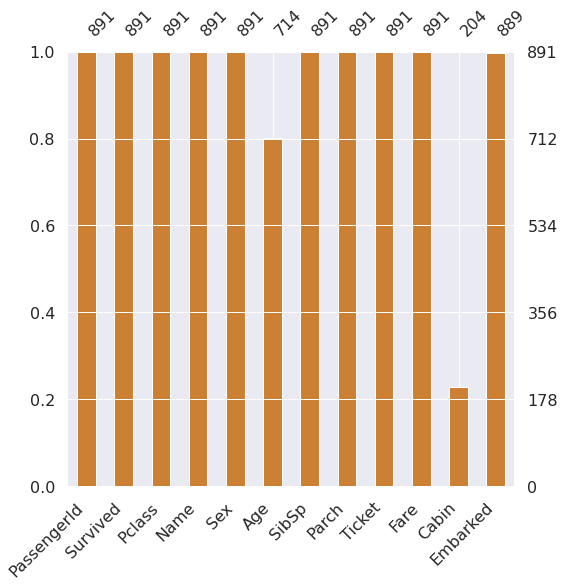

In [11]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), 
            color=(0.8, 0.5, 0.2))

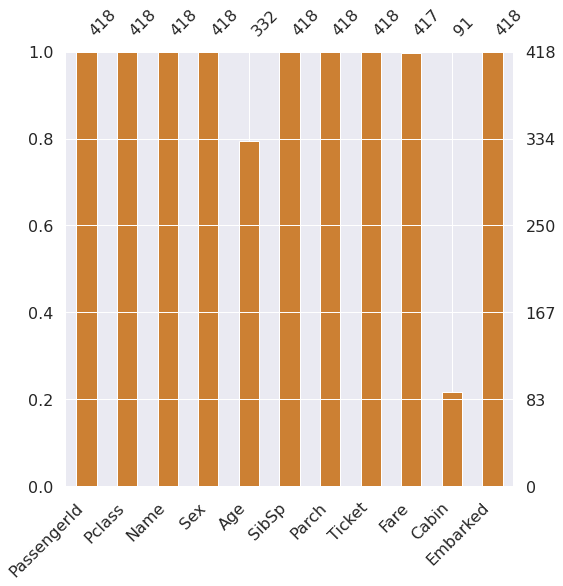

In [12]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), 
            color=(0.8, 0.5, 0.2))

## Target label 확인

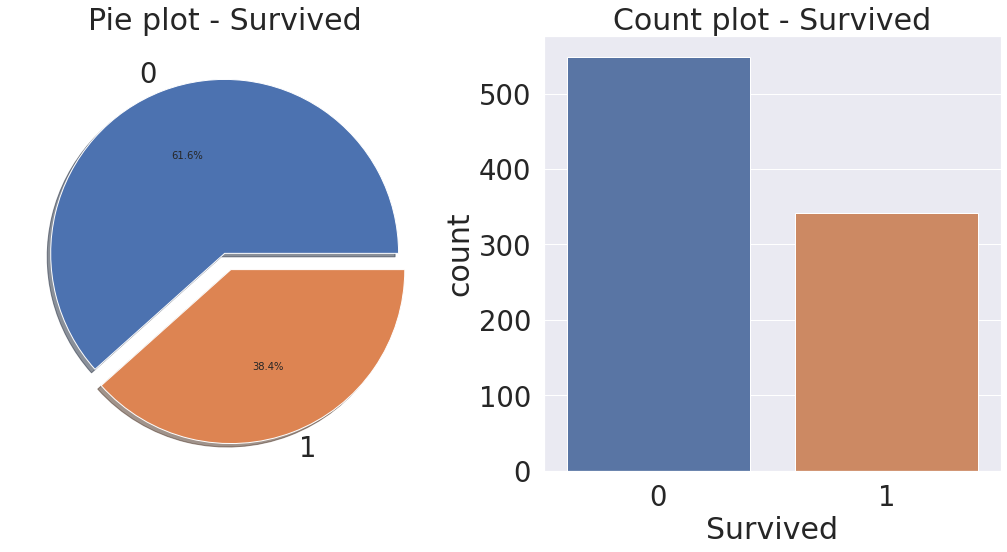

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                             autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 38.4% 생존

# Exploratoy data analusis

## Pclass

In [17]:
# 각 class 에 몇명이 있는지 확인
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
                                         as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
# 생존한 사람의 총합을 확인
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
                                         as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [19]:
#pandas 의 crosstab 을 사용
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


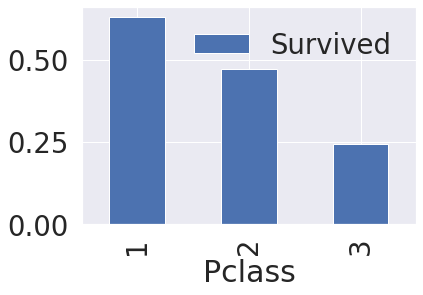

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', 
                                                                                       ascending=False).plot.bar()